In [107]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from datetime import timedelta



In [108]:
df = pd.read_csv('seg_rfm.csv') 
df1 = pd.read_csv('test_rfm.csv')

In [109]:
scaler = MinMaxScaler()

df_scale = scaler.fit_transform(df[['Recence', 'Frequence', 'Montant']])
optimal_n = 3

kmeans = KMeans(n_clusters=optimal_n, n_init='auto' random_state=0)
clusters = kmeans.fit_predict(df_scale)

df['Cluster'] = clusters


/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

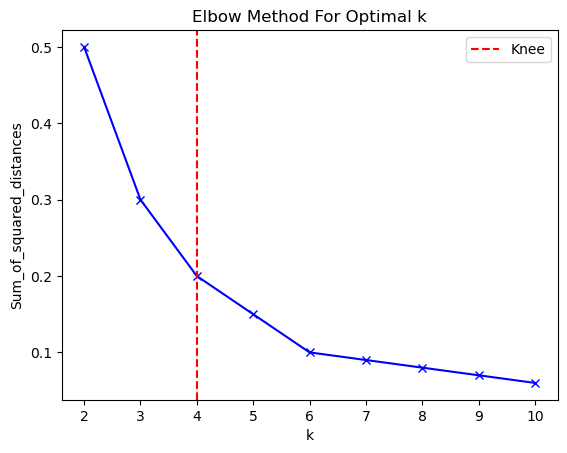

Valeur de k coude : 4


In [110]:
Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)
    
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = [0.5, 0.3, 0.2, 0.15, 0.1, 0.09, 0.08, 0.07, 0.06]

x = np.array(K)
y = np.array(Sum_of_squared_distances)

kneedle = KneeLocator(x, y, curve='convex', direction='decreasing')
k_value = kneedle.knee

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(x=k_value, color='r', linestyle='--', label='Knee')
plt.legend()
plt.show()

print("Valeur de k coude :", k_value)


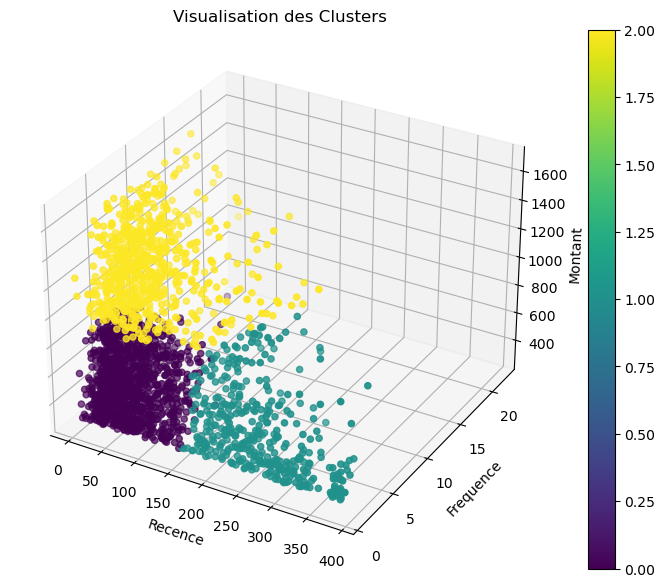

In [111]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()


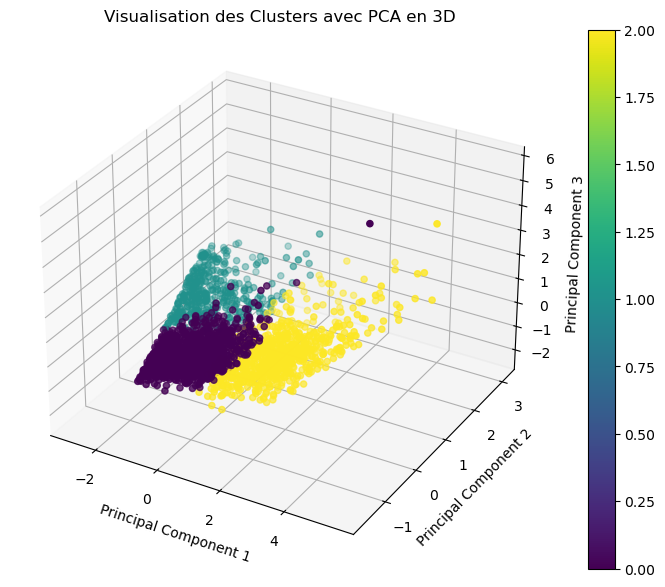

In [112]:
num_cols = ['Recence', 'Frequence', 'Montant']
data_num = df[num_cols]

data_num = (data_num - data_num.mean()) / data_num.std()

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_num)

df_principal = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_principal['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_principal['principal component 1'], df_principal['principal component 2'], df_principal['principal component 3'], c=df_principal['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters avec PCA en 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.colorbar(scatter)
plt.show()


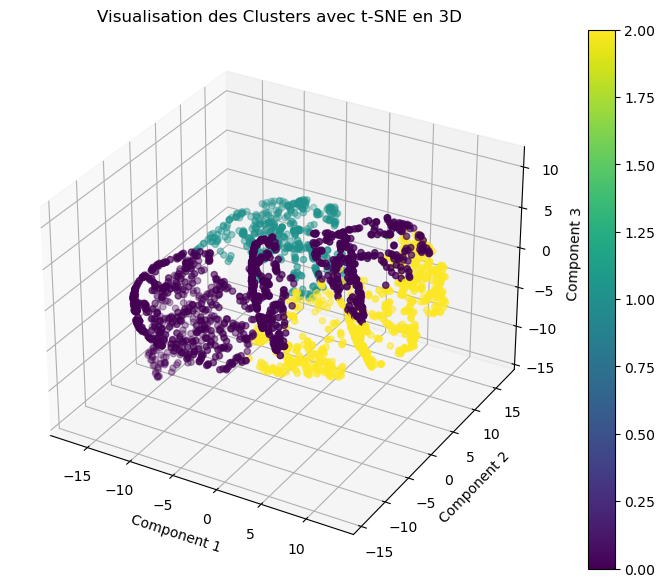

In [113]:
num_cols = ['Recence', 'Frequence', 'Montant']
data_num = df[num_cols]

data_num = (data_num - data_num.mean()) / data_num.std()

tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data_num)

df_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2', 'Component 3'])
df_tsne['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_tsne['Component 1'], df_tsne['Component 2'], df_tsne['Component 3'], c=df_tsne['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters avec t-SNE en 3D')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.colorbar(scatter)
plt.show()


## Kmeans


In [114]:
scaler = MinMaxScaler()

df_scale = scaler.fit_transform(df[['Recence', 'Frequence', 'Montant','TotalSale','Nb_Annulations','Total_Commandes']])
optimal_n = 4

kmeans = KMeans(n_clusters=optimal_n, random_state=0)
clusters = kmeans.fit_predict(df_scale)

df['Cluster'] = clusters

/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


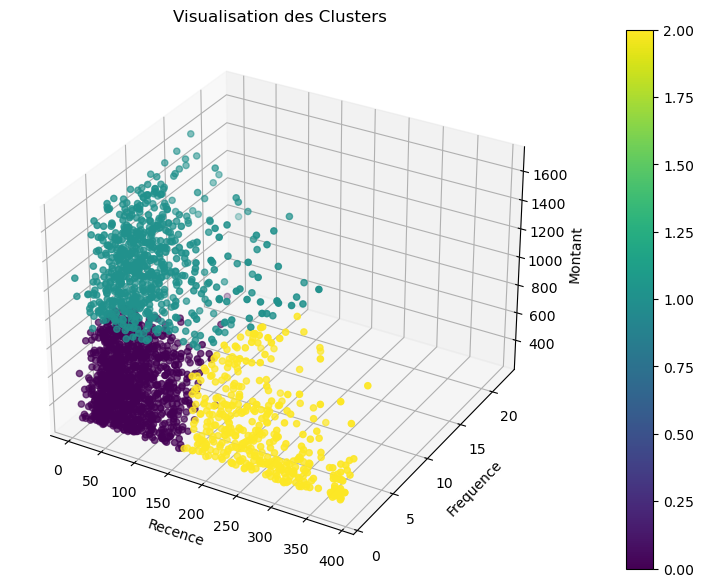

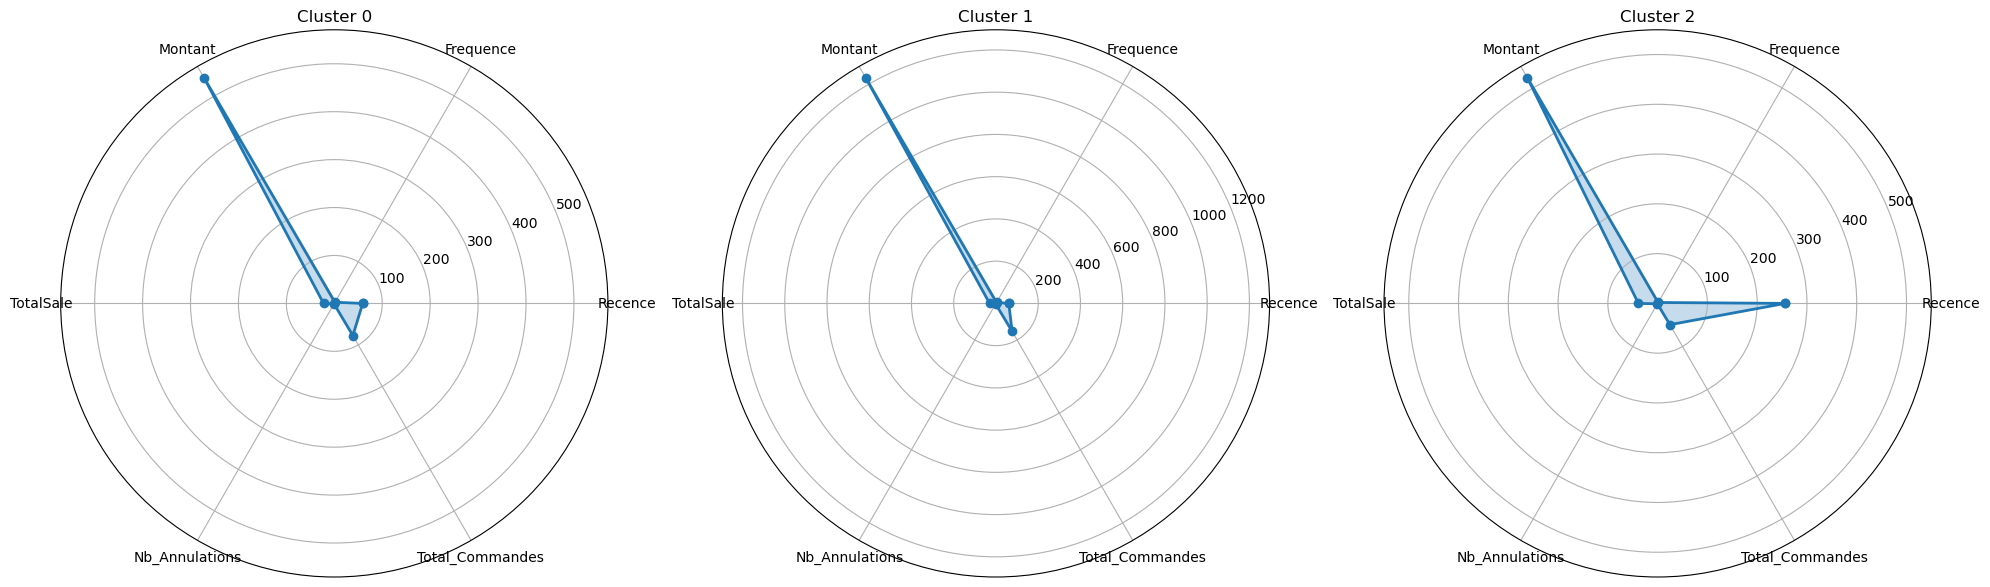

In [115]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Recence'], df['Frequence'], df['Montant'], c=df['Cluster'], cmap='viridis')

ax.set_title('Visualisation des Clusters')
ax.set_xlabel('Recence')
ax.set_ylabel('Frequence')
ax.set_zlabel('Montant')

plt.colorbar(scatter)
plt.show()

caracteristiques = ['Recence', 'Frequence', 'Montant', 'TotalSale', 'Nb_Annulations', 'Total_Commandes']
cluster_means = df.groupby('Cluster')[caracteristiques].mean()

angles = [n / float(len(caracteristiques)) * 2 * np.pi for n in range(len(caracteristiques))]
angles += angles[:1]

fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=len(cluster_means), subplot_kw=dict(polar=True))

for cluster, ax in zip(cluster_means.index, axes):
    values = cluster_means.loc[cluster].values.tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(caracteristiques)
    ax.set_title(f'Cluster {cluster}')
    ax.grid(True)

plt.tight_layout()
plt.show()
